In [3]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = []
datapath = '/home/bigdatas16/1101.csv'
data = pd.read_csv(datapath)
#data.append(pd.read_csv(datapath))

In [10]:
#A(data,2)
#data[0].head()
data.head(2)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41


In [11]:
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for i in dataList:
        if i - day + 1 >= 0:
            # 移動平均數 = 採樣天數的股價合計 / 採樣天數
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries

In [12]:
# 乖離率(BIAS)
def BIAS(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

In [13]:
(11.28 - 11.692)/11.692

-0.035237769414984674

In [14]:
MA(data,10)
BIAS(data,10)
data.head(11)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,BIAS10
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,-4.600812


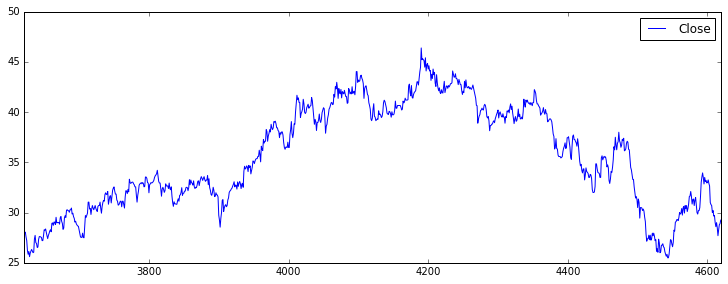

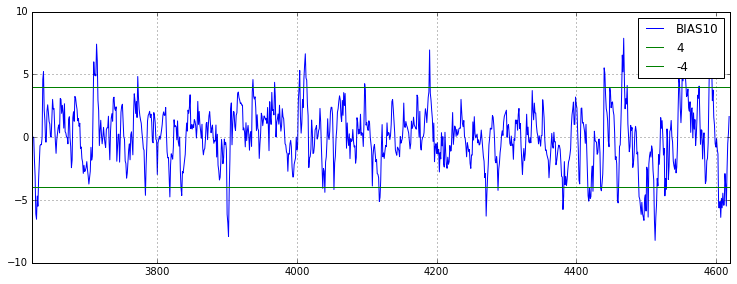

In [15]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][3621:4621].plot()
data[["BIAS10"]][3621:4621].plot()
plt.axhline(4,color = 'g',linestyle = '-',label = '4')
plt.axhline(-4,color = 'g',linestyle = '-',label = '-4')
plt.grid()
plt.legend();

In [16]:
# 乖離率(BIAS)
def BIAS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

In [17]:
MA(data,10)
BIAS_lag(data,10)

In [18]:
data.head(50)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,BIAS10
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,0.000000


In [19]:
for i in range(24):
    MA(data,1+i)
    BIAS_lag(data,1+i)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 57 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
BIAS10      4621 non-null float64
MA1         4620 non-null float64
BIAS1       4621 non-null float64
MA2         4621 non-null float64
BIAS2       4621 non-null float64
MA3         4621 non-null float64
BIAS3       4621 non-null float64
MA4         4621 non-null float64
BIAS4       4621 non-null float64
MA5         4621 non-null float64
BIAS5       4621 non-null float64
MA6         4621 non-null float64
BIAS6       4621 non-null float64
MA7         4621 non-null float64
BIAS7       4621 non-null float64
MA8         4621 non-null float64
BIAS8     

In [21]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MA20,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,28.815000,...,30.280000,-5.558288,30.419048,-5.940902,30.540909,-6.341463,30.669565,-6.618735,30.760417,-6.952951
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,28.775000,...,30.095000,-4.557464,30.230952,-4.993738,30.365909,-5.372823,30.484783,-5.769776,30.610417,-6.048087
4620,2016/5/26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.672222,...,29.942105,-2.807775,30.095000,-3.244861,30.230952,-3.674875,30.365909,-4.050488,30.484783,-4.444293


In [22]:
data = data.drop(data.index[4620])

In [23]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MA20,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,28.815,...,30.280,-5.558288,30.419048,-5.940902,30.540909,-6.341463,30.669565,-6.618735,30.760417,-6.952951
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,28.775,...,30.095,-4.557464,30.230952,-4.993738,30.365909,-5.372823,30.484783,-5.769776,30.610417,-6.048087


In [24]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries

In [25]:
UP_DOWN(data)

In [68]:
len(data)*(2.0/10)

924.0

In [63]:
data[4527:4700].head(2)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24,UP_DOWN
4527,2016/1/4,27.30,27.3,26.15,26.15,10437.0,275489.0,-4.21,14.69,27.430,...,-2.907442,28.023810,-3.289474,28.134091,-3.641906,28.236957,-3.961456,28.331250,-4.105379,0
4528,2016/1/5,26.15,26.7,26.10,26.40,5382.0,141869.0,0.96,14.83,27.295,...,-6.322766,27.842857,-6.686491,27.950000,-7.052266,28.058696,-7.390869,28.160417,-7.699096,1


In [27]:
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Volume_n','Volume_m','return','PE','MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MA12','MA13','MA14','MA15','MA16','MA17','MA18','MA19','MA20','MA21','MA22','MA23','MA24'], axis=1)

In [28]:
data1.head()

,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23,BIAS24,UP_DOWN
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-0.638978,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-0.810373,-1.502146,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-0.948454,-1.798855,-2.536011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 25 columns):
BIAS10     4620 non-null float64
BIAS1      4620 non-null float64
BIAS2      4620 non-null float64
BIAS3      4620 non-null float64
BIAS4      4620 non-null float64
BIAS5      4620 non-null float64
BIAS6      4620 non-null float64
BIAS7      4620 non-null float64
BIAS8      4620 non-null float64
BIAS9      4620 non-null float64
BIAS11     4620 non-null float64
BIAS12     4620 non-null float64
BIAS13     4620 non-null float64
BIAS14     4620 non-null float64
BIAS15     4620 non-null float64
BIAS16     4620 non-null float64
BIAS17     4620 non-null float64
BIAS18     4620 non-null float64
BIAS19     4620 non-null float64
BIAS20     4620 non-null float64
BIAS21     4620 non-null float64
BIAS22     4620 non-null float64
BIAS23     4620 non-null float64
BIAS24     4620 non-null float64
UP_DOWN    4620 non-null int64
dtypes: float64(24), int64(1)
memory usage: 938.4 KB


In [30]:
data1 = data1.fillna(-1)

In [31]:
data1.head()

,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23,BIAS24,UP_DOWN
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-0.638978,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-0.810373,-1.502146,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-0.948454,-1.798855,-2.536011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
cols = data1.columns.tolist()
cols[24]

'UP_DOWN'

In [33]:
data1 = data1[[cols[24]] + cols[0:23]]

In [34]:
data1.head(10)

,UP_DOWN,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,...,BIAS14,BIAS15,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23
0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,-0.638978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,-0.810373,-1.502146,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,-0.948454,-1.798855,-2.536011,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,-0.586265,-1.411960,-2.224053,-2.959451,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,-0.423012,-0.953717,-1.691376,-2.453174,-3.167421,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,-2.884615,-4.086331,-4.961506,-5.847458,-6.690929,-7.460733,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,1.024499,-0.584454,-1.583858,-2.409639,-3.269832,-4.107272,-4.885720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,1.047120,2.086394,1.135371,0.398821,-0.287026,-1.049805,-1.822806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = data1.iloc[:,1:]
Y = data1.iloc[:,0:1] 

In [36]:
X.head()

,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,BIAS14,BIAS15,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.638978,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.810373,-1.502146,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.948454,-1.798855,-2.536011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
Y.head()

,UP_DOWN
0,0
1,0
2,0
3,0
4,0


In [38]:
n = len(data['Date'])/5
#X_train = X.iloc[:n, :]
#Y_train = Y.iloc[:n]
#X_test = X.iloc[n:, :]
#Y_test = Y.iloc[n:]

In [39]:
n

924

In [46]:
m = len(data['Date']) - n
m

3696

In [41]:
sql_sc = SQLContext(sc)
sql_sc

In [47]:
train_data = data1.iloc[:m,:]
train_data

,UP_DOWN,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,...,BIAS14,BIAS15,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23
0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0.000000,0.0,-0.638978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0.000000,0.0,-0.810373,-1.502146,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.000000,0.0,-0.948454,-1.798855,-2.536011,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,0.000000,0.0,-0.586265,-1.411960,-2.224053,-2.959451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,0.000000,0.0,-0.423012,-0.953717,-1.691376,-2.453174,-3.167421,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,0.000000,0.0,-2.884615,-4.086331,-4.961506,-5.847458,-6.690929,-7.460733,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,0.000000,0.0,1.024499,-0.584454,-1.583858,-2.409639,-3.269832,-4.107272,-4.885720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0,0.000000,0.0,1.047120,2.086394,1.135371,0.398821,-0.287026,-1.049805,-1.822806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#train_data = data1.iloc[:m,:]

In [88]:
m/5

739

In [92]:
train_data.iloc[:(m/5),:][(m/5-5):(m/5)]

,UP_DOWN,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,...,BIAS14,BIAS15,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23
734,0,-2.028229,0.0,-1.608100,-2.479339,-3.051643,-2.456306,-1.529903,-1.314217,-1.681297,...,-3.213927,-3.684701,-4.190228,-4.573564,-4.661751,-4.427258,-4.541777,-4.571712,-4.893495,-5.331872
735,0,-0.807793,0.0,0.541842,-0.357995,-1.066351,-1.602640,-1.163938,-0.391956,-0.209143,...,-1.789465,-2.018306,-2.474633,-2.966710,-3.344051,-3.438831,-3.222068,-3.340499,-3.376815,-3.695718
736,0,-0.488619,0.0,0.000000,0.360577,-0.268737,-0.854904,-1.339110,-0.999322,-0.343130,...,-1.375179,-1.672162,-1.894551,-2.332462,-2.806518,-3.173634,-3.272517,-3.073351,-3.193508,-3.234746
737,0,-2.649562,0.0,-1.396478,-1.853344,-1.813785,-2.427301,-3.006172,-3.497453,-3.275759,...,-3.571126,-3.829451,-4.118081,-4.338184,-4.756940,-5.210125,-5.564924,-5.670189,-5.496482,-5.619567
738,0,-8.376647,0.0,-3.439490,-5.446985,-6.419753,-6.787998,-7.542183,-8.216572,-8.784597,...,-9.073773,-9.380728,-9.647620,-9.938496,-10.165920,-10.568803,-11.001526,-11.345029,-11.462702,-11.326993


In [276]:
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]


In [277]:
cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])
cross_sql[0].show(1)

+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|UP_DOWN|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
only showing top 1 row



In [74]:
test_data = data1.iloc[m:,:]
len(test_data)

924

In [180]:
test_sql = sql_sc.createDataFrame(test_data)
test_sql.show(2)

+-------+-------------------+-----+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|UP_DOWN|             BIAS10|BIAS1|               BIAS2|              BIAS3|              BIAS4|              BIAS5|              BIAS6|              BIAS7|              BIAS8|              BIAS9|            BIAS11|            BIAS12|             BIAS13|             BIAS14|             BIAS15|             BIAS16|             BIAS17|             BIAS18|             BIAS19|             BIAS20|            BIAS21|             BIAS22|            BIAS23|
+-------+-------------------+-----+--------------------+-------------------+------------------

In [170]:
#test_data

In [171]:
#X_train_sql = sql_sc.createDataFrame(X_train)
#Y_train_sql = sql_sc.createDataFrame(Y_train)
#X_test_sql = sql_sc.createDataFrame(X_test)
#Y_test_sql = sql_sc.createDataFrame(Y_test)

In [34]:
#Y_train_sql.show(2)

In [35]:
#X_train_sql.show(2)

In [181]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

In [175]:
#assembler = VectorAssembler(inputCols=["BIAS1","BIAS2"],outputCol="features")
#output = assembler.transform(X_train_sql)

In [176]:
#train_sql.show()

In [183]:
assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")

#train_sql = assembler1.transform(train_sql)
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])

+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|UP_DOWN|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|  features|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|(23,[],[])|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
only showing top 1 row



In [185]:
cross_sql[4].show(1)

+-------+-----------------+-----+-----+--------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+
|UP_DOWN|           BIAS10|BIAS1|BIAS2|               BIAS3|               BIAS4|             BIAS5|             BIAS6|            BIAS7|            BIAS8|            BIAS9|           BIAS11|           BIAS12|           BIAS13|            BIAS14|           BIAS15|           BIAS16|            BIAS17|            BIAS18|            BIAS19|            BIAS20|           BIAS21|            BIAS22|            BIAS23|            features|
+-------+-----------------+-----+-----+--------------------+--------------------+------------------+------------------+---------

In [178]:
#assembler2 = VectorAssembler(inputCols=["UP_DOWN"],outputCol="indexedLabel")
#train_sql = assembler2.transform(train_sql)

In [186]:
cross_sql[4].select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[0.0,0.0,-0.23809...|
|[0.0,-0.139414459...|
|[0.0,0.5553351844...|
|[0.0,-0.276898734...|
|[0.0,1.0402355250...|
+--------------------+
only showing top 5 rows



In [187]:
cross_sql[4].select("UP_DOWN").show(5)

+-------+
|UP_DOWN|
+-------+
|      0|
|      1|
|      0|
|      1|
|      0|
+-------+
only showing top 5 rows



In [ ]:
#cross data = cross_sql[0]


In [202]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")

#train_sql = assembler1.transform(train_sql)
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])

frames_1 = [cross_data_pandas[1],cross_data_pandas[2],cross_data_pandas[3],cross_data_pandas[4]]
result_1 = pd.concat(frames_1)
result_1_sql = sql_sc.createDataFrame(result_1)
assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
result_1_sql = assembler1.transform(result_1_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_1_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_1_sql)
#rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(result_1_sql)
assembler = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
cross_sql[0] = assembler.transform(cross_sql[0])
predictions = model.transform(cross_sql[0])
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))


In [290]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

cv5_test_error = []    
numTrees_maxDepth = []    
for j in range(1,7,1):
    for k in range(1,21,1):
        Test_Error = []
        for i in range(0,5):
            labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
            featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
            #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
            rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j)
            # Chain indexers and forest in a Pipeline
            pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
            model = pipeline.fit(result_sql[i])
            predictions = model.transform(cross_sql[i])
            evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
            accuracy = evaluator.evaluate(predictions)
            print("Test Error(%d) = %g" % (i,1.0 - accuracy))
            Test_Error.append(1.0 - accuracy)
        cv5_test_error.append(mean(Test_Error))
        numTrees_maxDepth.append([i,j])
        
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(numTrees_maxDepth[i],mintest)       

Test Error(0) = 0.440171
Test Error(1) = 0.434464
Test Error(2) = 0.553956
Test Error(3) = 0.541756
Test Error(4) = 0.551323
Test Error(0) = 0.478178
Test Error(1) = 0.441838
Test Error(2) = 0.554643
Test Error(3) = 0.539621
Test Error(4) = 0.554313
Test Error(0) = 0.440973
Test Error(1) = 0.441837
Test Error(2) = 0.553956
Test Error(3) = 0.570785
Test Error(4) = 0.551992
Test Error(0) = 0.442912
Test Error(1) = 0.440042
Test Error(2) = 0.553956
Test Error(3) = 0.541756
Test Error(4) = 0.554974
Test Error(0) = 0.442912
Test Error(1) = 0.444319
Test Error(2) = 0.55103
Test Error(3) = 0.539621
Test Error(4) = 0.551323
Test Error(0) = 0.440529
Test Error(1) = 0.519021
Test Error(2) = 0.553956
Test Error(3) = 0.539621
Test Error(4) = 0.551323
Test Error(0) = 0.442912
Test Error(1) = 0.519021
Test Error(2) = 0.553956
Test Error(3) = 0.541756
Test Error(4) = 0.551323
Test Error(0) = 0.440973
Test Error(1) = 0.44094
Test Error(2) = 0.553956
Test Error(3) = 0.541387
Test Error(4) = 0.554313
Te

In [305]:
#train_data = data1.iloc[:m,:]
#train_sql = sql_sc.createDataFrame(train_data)

In [306]:
#test_data = data1.iloc[m:,:]
#test_sql = sql_sc.createDataFrame(test_data)

In [307]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                        ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                        ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                        ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 4,maxDepth = 6)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                        ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                        ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                        ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
1.0 - accuracy

0.6036434651971205

In [308]:
prediction_1101 = predictions.select("prediction", "indexedLabel")

In [309]:
prediction_1101

DataFrame[prediction: double, indexedLabel: double]

In [310]:
import pandas
prediction_1101_pandas = prediction_1101.toPandas()
prediction_1101_pandas.head(10)

,prediction,indexedLabel
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,1.0


In [351]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [352]:
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
cm

array([[494,  13],
       [411,   6]])

In [353]:
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,494,13
1.0,411,6


In [354]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

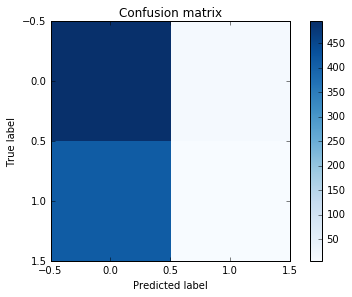

In [355]:
plot_confusion_matrix(cm)
plt.show()

In [365]:
data

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24,UP_DOWN
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [382]:
4621-n

3697

In [393]:
data[['Close','Open']][(4621-n):4622]

,Close,Open
3697,28.76,28.67
3698,28.67,28.76
3699,28.63,28.67
3700,28.29,28.50
3701,27.95,28.33
3702,27.57,28.00
3703,27.53,27.57
3704,27.53,27.49
3705,27.95,27.66
3706,27.53,27.91


In [394]:
data_p = data[['Close','Open']][(4621-n):4621].values

In [395]:
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])

In [396]:
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result1.head()

,test,prediction
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [399]:
result2 = pd.concat([data_p1, result1], axis=1)
result2.head()

,Close,Open,test,prediction
0,28.76,28.67,1.0,0.0
1,28.67,28.76,1.0,0.0
2,28.63,28.67,0.0,0.0
3,28.29,28.50,0.0,0.0
4,27.95,28.33,0.0,0.0


In [400]:
result2["Cl - Op"] = result2['Close'] - result2['Open']

In [401]:
result2['prediction'] = result2['prediction'].replace(0,-1)

In [405]:
result2['profit'] = result2['Cl - Op'] * result2['prediction']

In [406]:
result2 

,Close,Open,test,prediction,Cl - Op,profit1,profit
0,28.76,28.67,1.0,-1.0,0.09,-0.09,-0.09
1,28.67,28.76,1.0,-1.0,-0.09,0.09,0.09
2,28.63,28.67,0.0,-1.0,-0.04,0.04,0.04
3,28.29,28.50,0.0,-1.0,-0.21,0.21,0.21
4,27.95,28.33,0.0,-1.0,-0.38,0.38,0.38
5,27.57,28.00,0.0,-1.0,-0.43,0.43,0.43
6,27.53,27.57,0.0,-1.0,-0.04,0.04,0.04
7,27.53,27.49,0.0,-1.0,0.04,-0.04,-0.04
8,27.95,27.66,1.0,-1.0,0.29,-0.29,-0.29
9,27.53,27.91,1.0,-1.0,-0.38,0.38,0.38


In [407]:
a = result2['profit'].cumsum()
result2['cumsum'] = a
result2.head()

,Close,Open,test,prediction,Cl - Op,profit1,profit,cumsum
0,28.76,28.67,1.0,-1.0,0.09,-0.09,-0.09,-0.09
1,28.67,28.76,1.0,-1.0,-0.09,0.09,0.09,0.00
2,28.63,28.67,0.0,-1.0,-0.04,0.04,0.04,0.04
3,28.29,28.50,0.0,-1.0,-0.21,0.21,0.21,0.25
4,27.95,28.33,0.0,-1.0,-0.38,0.38,0.38,0.63


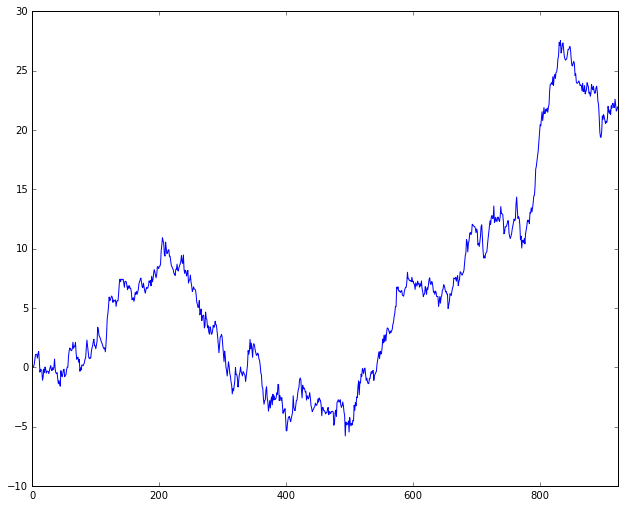

In [408]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [324]:
result2['processing fee'] = (result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)) * result2['prediction']

In [325]:
result2['profit_r_fee'] = result2['profit'] - result2['processing fee']

In [326]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0


In [327]:
b = result2['profit_r_fee'].cumsum()
result2['cumsum_r_fee'] = b
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0


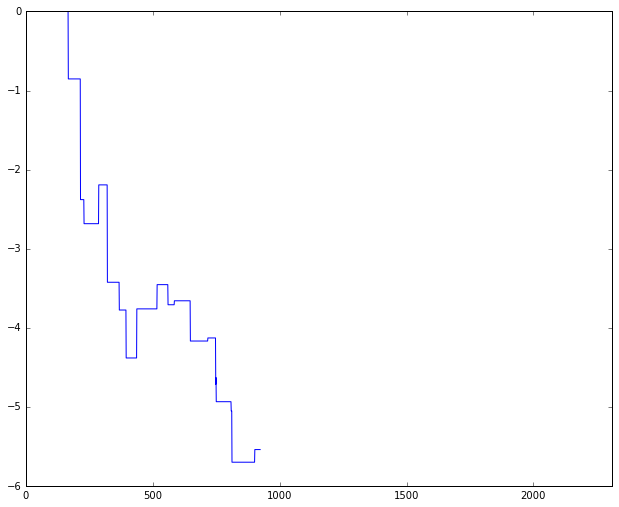

In [328]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
result2['cumsum_r_fee'].plot()

In [329]:
result2

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0
5,17.20,17.38,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
6,17.05,17.26,0.0,0.0,-0.21,-0.0,0.0,0.0,-0.0,0.0
7,17.17,17.14,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
8,17.08,17.48,1.0,0.0,-0.40,-0.0,0.0,0.0,-0.0,0.0
9,17.32,17.08,1.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0


In [330]:
result2['profit2'] = 0.0
#len(result2)
result2['profit2'][1]

0.0

In [331]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,0.0


In [332]:
result2['profit2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i] + (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] + result2['Close'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i]

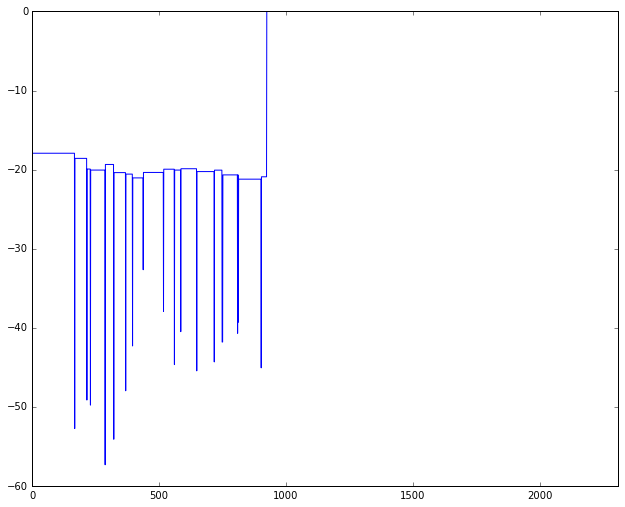

In [333]:
result2['profit2'].plot()

In [334]:
result2['processing_fee_2'] = 0.0

In [335]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0


In [336]:
result2['processing_fee_2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + (-1) * result2['Open'][i+1] - (result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + result2['Close'][i] - (result2['Close'][i])*(4.425/1000.0)
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

In [337]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93


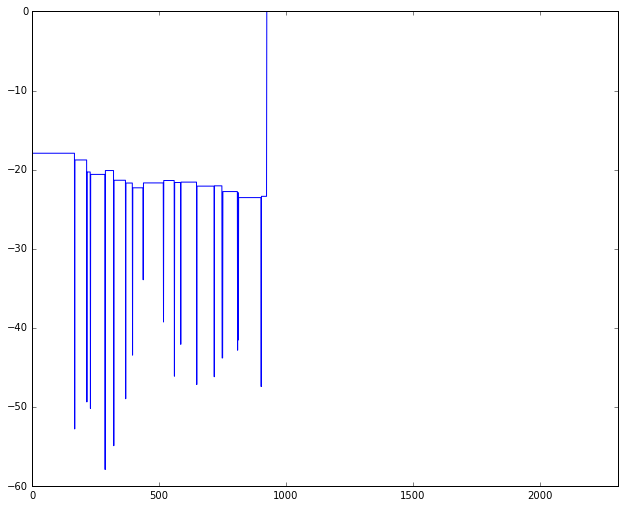

In [338]:
result2['processing_fee_2'].plot()#[1101:2301].plot()

In [339]:
result2['processing_fee_2']

0      -17.93
1      -17.93
2      -17.93
3      -17.93
4      -17.93
5      -17.93
6      -17.93
7      -17.93
8      -17.93
9      -17.93
10     -17.93
11     -17.93
12     -17.93
13     -17.93
14     -17.93
15     -17.93
16     -17.93
17     -17.93
18     -17.93
19     -17.93
20     -17.93
21     -17.93
22     -17.93
23     -17.93
24     -17.93
25     -17.93
26     -17.93
27     -17.93
28     -17.93
29     -17.93
        ...  
2280     0.00
2281     0.00
2282     0.00
2283     0.00
2284     0.00
2285     0.00
2286     0.00
2287     0.00
2288     0.00
2289     0.00
2290     0.00
2291     0.00
2292     0.00
2293     0.00
2294     0.00
2295     0.00
2296     0.00
2297     0.00
2298     0.00
2299     0.00
2300     0.00
2301     0.00
2302     0.00
2303     0.00
2304     0.00
2305     0.00
2306     0.00
2307     0.00
2308     0.00
2309     0.00
Name: processing_fee_2, dtype: float64